In [16]:
from facepplib import FacePP, exceptions
from __future__ import print_function, unicode_literals
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import cv2

In [428]:
#import UTK dataset
path = "/Users/ninahorstmann/Downloads/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)

Total samples: 23708


In [429]:
#Unpack data
images = []
ages = []
race = []
for file in files:
    image = cv2.imread(path+file,3)
    b,g,r = cv2.split(image)           # get b, g, r
    rgbimage = cv2.merge([r,g,b])     # switch it to r, g, b
    images.append(rgbimage)
    split_var = file.split('_')
    ages.append(split_var[0])
    race.append(split_var[2])

In [454]:
#Isolate images labeled as 'white'
white_idx = np.where(np.array(race)=='0')[0]
white_images = [images[i] for i in white_idx]
white_ages = [ages[i] for i in white_idx]
white_ages_int = [int(i) for i in white_ages]

#Isolate images labeled as 'black'
black_idx = np.where(np.array(race)=='1')[0]
black_images = [images[i] for i in black_idx]
black_ages = [ages[i] for i in black_idx]
black_ages_int = [int(i) for i in black_ages]

#Isolate images labeled as 'asian'
asian_idx = np.where(np.array(race)=='2')[0]
asian_images = [images[i] for i in asian_idx]
asian_ages = [ages[i] for i in asian_idx]
asian_ages_int = [int(i) for i in asian_ages]

#Isolate images labeled as 'indian'
indian_idx = np.where(np.array(race)=='3')[0]
indian_images = [images[i] for i in indian_idx]
indian_ages = [ages[i] for i in indian_idx]
indian_ages_int = [int(i) for i in indian_ages]

In [431]:
#Extract indices from previous random sampling
from numpy import genfromtxt
sample_idx = genfromtxt('sample_idx.csv', delimiter=',')
white_sample_idx = sample_idx[:,0]
black_sample_idx = sample_idx[:,1]
asian_sample_idx = sample_idx[:,2]
indian_sample_idx = sample_idx[:,3]

In [598]:
#Subdivide the dataset
white_sample_images = [white_images[int(i)] for i in white_sample_idx]
white_sample_ages = [white_ages[int(i)] for i in white_sample_idx]

black_sample_images = [black_images[int(i)] for i in black_sample_idx]
black_sample_ages = [black_ages[int(i)] for i in black_sample_idx]

asian_sample_images = [asian_images[int(i)] for i in asian_sample_idx]
asian_sample_ages = [asian_ages[int(i)] for i in asian_sample_idx]

indian_sample_images = [indian_images[int(i)] for i in indian_sample_idx]
indian_sample_ages = [indian_ages[int(i)] for i in indian_sample_idx]

4526
not there
4347


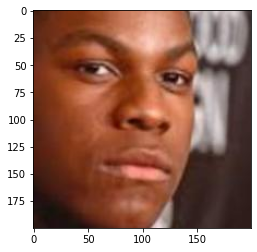

In [596]:
print(len(black_images))
idx = np.random.randint(0, len(black_images))
if idx not in black_sample_idx:
    print('not there')
    print(idx)
sample = black_images[idx]
plt.imshow(sample)

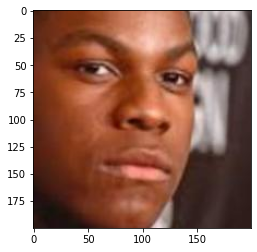

In [599]:
plt.imshow(black_sample_images[1850])
black_sample_idx[1850]=idx

In [601]:
#save images to folder
from pathlib import Path
disk_dir = Path("/Users/ninahorstmann/Documents/CS231/CS231/blackfaces2/")
image = black_sample_images[1850]
Image.fromarray(image).save(disk_dir / f"{1850}.png")
#Save new random sample indices as CSV file
np.savetxt('sample_idx.csv', np.c_[white_sample_idx,black_sample_idx,asian_sample_idx,indian_sample_idx],delimiter =", ")

#for i in range(1000):
    #image = indian_sample_images[i]
    #Image.fromarray(image).save(disk_dir / f"{i}.png")

In [602]:

np.savetxt('true_sample_ages.csv', np.c_[white_sample_ages,black_sample_ages,asian_sample_ages,indian_sample_ages],delimiter =", ",fmt='%s')


In [283]:
#indian_face_urls=[]
for i in range(1000,2000):
    url = 'https://github.com/ninadewi/CS231/raw/main/indianfaces2/'+str(i)+'.png'
    indian_face_urls.append(url)

In [408]:
import requests

api_url = 'https://api-us.faceplusplus.com/facepp/v3/detect'
key = "U0X0u3d0D5q2JT12O4fLuhdrMoBIN1rz"
secret = "z6DaOW3i0B8jHs5vZ5qP2oVUbFzvEI-w"
#urls=["https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Premios_Goya_2018_-_Pen%C3%A9lope_Cruz.jpg/220px-Premios_Goya_2018_-_Pen%C3%A9lope_Cruz.jpg",
     #'https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Pen%C3%A9lope_Cruz_2003.jpg/170px-Pen%C3%A9lope_Cruz_2003.jpg']
#facepp_indian_ages = []

for i in range(2000):
    json_resp = requests.post(api_url,
          data = { 
              'api_key': key,
              'api_secret': secret,
              'image_url': indian_face_urls[i],
              'return_attributes': 'age'
          }
    )

#print("Response : ", json_resp.text)
    print(indian_face_urls[i])
    facepp_age=json_resp.json()['faces'][0]['attributes']['age']['value']
    #print(facepp_age)
    facepp_indian_ages.append(facepp_age)
    if int(i)%100==0:
        print(i)

#print(facepp_black_ages)

https://github.com/ninadewi/CS231/raw/main/indianfaces1/0.png
0
https://github.com/ninadewi/CS231/raw/main/indianfaces1/1.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/2.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/3.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/4.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/5.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/6.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/7.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/8.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/9.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/10.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/11.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/12.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/13.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/14.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/15.png


https://github.com/ninadewi/CS231/raw/main/indianfaces1/130.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/131.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/132.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/133.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/134.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/135.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/136.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/137.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/138.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/139.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/140.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/141.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/142.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/143.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/144.png
https://github.com/ninadewi/CS231/raw/ma

https://github.com/ninadewi/CS231/raw/main/indianfaces1/258.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/259.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/260.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/261.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/262.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/263.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/264.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/265.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/266.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/267.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/268.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/269.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/270.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/271.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/272.png
https://github.com/ninadewi/CS231/raw/ma

https://github.com/ninadewi/CS231/raw/main/indianfaces1/386.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/387.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/388.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/389.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/390.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/391.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/392.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/393.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/394.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/395.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/396.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/397.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/398.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/399.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/400.png
400
https://github.com/ninadewi/CS231/ra

https://github.com/ninadewi/CS231/raw/main/indianfaces1/514.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/515.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/516.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/517.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/518.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/519.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/520.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/521.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/522.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/523.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/524.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/525.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/526.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/527.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/528.png
https://github.com/ninadewi/CS231/raw/ma

https://github.com/ninadewi/CS231/raw/main/indianfaces1/642.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/643.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/644.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/645.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/646.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/647.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/648.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/649.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/650.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/651.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/652.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/653.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/654.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/655.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/656.png
https://github.com/ninadewi/CS231/raw/ma

https://github.com/ninadewi/CS231/raw/main/indianfaces1/770.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/771.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/772.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/773.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/774.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/775.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/776.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/777.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/778.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/779.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/780.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/781.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/782.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/783.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/784.png
https://github.com/ninadewi/CS231/raw/ma

https://github.com/ninadewi/CS231/raw/main/indianfaces1/898.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/899.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/900.png
900
https://github.com/ninadewi/CS231/raw/main/indianfaces1/901.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/902.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/903.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/904.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/905.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/906.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/907.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/908.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/909.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/910.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/911.png
https://github.com/ninadewi/CS231/raw/main/indianfaces1/912.png
https://github.com/ninadewi/CS231/ra

https://github.com/ninadewi/CS231/raw/main/indianfaces2/1026.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1027.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1028.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1029.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1030.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1031.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1032.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1033.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1034.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1035.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1036.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1037.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1038.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1039.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1040.png
https://github.com/ninade

https://github.com/ninadewi/CS231/raw/main/indianfaces2/1152.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1153.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1154.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1155.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1156.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1157.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1158.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1159.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1160.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1161.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1162.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1163.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1164.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1165.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1166.png
https://github.com/ninade

https://github.com/ninadewi/CS231/raw/main/indianfaces2/1278.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1279.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1280.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1281.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1282.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1283.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1284.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1285.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1286.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1287.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1288.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1289.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1290.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1291.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1292.png
https://github.com/ninade

https://github.com/ninadewi/CS231/raw/main/indianfaces2/1404.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1405.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1406.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1407.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1408.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1409.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1410.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1411.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1412.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1413.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1414.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1415.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1416.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1417.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1418.png
https://github.com/ninade

https://github.com/ninadewi/CS231/raw/main/indianfaces2/1530.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1531.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1532.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1533.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1534.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1535.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1536.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1537.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1538.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1539.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1540.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1541.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1542.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1543.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1544.png
https://github.com/ninade

https://github.com/ninadewi/CS231/raw/main/indianfaces2/1656.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1657.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1658.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1659.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1660.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1661.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1662.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1663.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1664.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1665.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1666.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1667.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1668.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1669.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1670.png
https://github.com/ninade

https://github.com/ninadewi/CS231/raw/main/indianfaces2/1782.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1783.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1784.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1785.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1786.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1787.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1788.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1789.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1790.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1791.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1792.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1793.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1794.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1795.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1796.png
https://github.com/ninade

https://github.com/ninadewi/CS231/raw/main/indianfaces2/1908.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1909.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1910.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1911.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1912.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1913.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1914.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1915.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1916.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1917.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1918.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1919.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1920.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1921.png
https://github.com/ninadewi/CS231/raw/main/indianfaces2/1922.png
https://github.com/ninade

In [410]:
#save as csv
np.savetxt("facepp_white_ages.csv", facepp_white_ages, delimiter =", ", 
           fmt ='% s')

np.savetxt("facepp_black_ages.csv", facepp_black_ages, delimiter =", ", 
           fmt ='% s')

np.savetxt("facepp_asian_ages.csv", facepp_asian_ages, delimiter =", ", 
           fmt ='% s')

np.savetxt("facepp_indian_ages.csv", facepp_indian_ages, delimiter =", ", 
           fmt ='% s')

In [411]:
#Save Face++ predicted age as CSV file
np.savetxt('facepp_ages.csv', np.c_[facepp_white_ages,facepp_black_ages,facepp_asian_ages,facepp_indian_ages],delimiter =", ")

In [413]:
#divide ages into buckets with range of 5
from sklearn import metrics
indian_detectedbuckets=[]
indian_truebuckets=[]
for i in facepp_indian_ages:
    bucket = 5 * round(i/5)
    indian_detectedbuckets.append(bucket)
for i in indian_sample_ages:
    i = int(i)
    bucket = 5 * round(i/5)
    indian_truebuckets.append(bucket)
indian_accuracy=metrics.accuracy_score(indian_truebuckets, indian_detectedbuckets)
print('indian accuracy',indian_accuracy)

asian_detectedbuckets=[]
asian_truebuckets=[]
for i in facepp_asian_ages:
    bucket = 5 * round(i/5)
    asian_detectedbuckets.append(bucket)
for i in asian_sample_ages:
    i = int(i)
    bucket = 5 * round(i/5)
    asian_truebuckets.append(bucket)
asian_accuracy=metrics.accuracy_score(asian_truebuckets, asian_detectedbuckets)
print('asian accuracy',asian_accuracy)

white_detectedbuckets=[]
white_truebuckets=[]
for i in facepp_white_ages:
    bucket = 5 * round(i/5)
    white_detectedbuckets.append(bucket)
for i in white_sample_ages:
    i = int(i)
    bucket = 5 * round(i/5)
    white_truebuckets.append(bucket)
white_accuracy=metrics.accuracy_score(white_truebuckets, white_detectedbuckets)
print('white accuracy',white_accuracy)

black_detectedbuckets=[]
black_truebuckets=[]
for i in facepp_black_ages:
    bucket = 5 * round(i/5)
    black_detectedbuckets.append(bucket)
for i in black_sample_ages:
    i = int(i)
    bucket = 5 * round(i/5)
    black_truebuckets.append(bucket)
black_accuracy=metrics.accuracy_score(black_truebuckets, black_detectedbuckets)
print('black accuracy',black_accuracy)

#Save predicted age buckets as CSV file
np.savetxt('facepp_age_buckets.csv', np.c_[white_detectedbuckets,black_detectedbuckets,asian_detectedbuckets,indian_detectedbuckets],delimiter =", ")

indian accuracy 0.221
asian accuracy 0.371
white accuracy 0.1725
black accuracy 0.2525


In [604]:
all_truebuckets = white_truebuckets + black_truebuckets + asian_truebuckets + indian_truebuckets
all_detectedbuckets = white_detectedbuckets + black_detectedbuckets + asian_detectedbuckets + indian_detectedbuckets
overall_accuracy = metrics.accuracy_score(all_truebuckets, all_detectedbuckets)
print('overall accuracy',overall_accuracy)

overall accuracy 0.25425


In [422]:

#calculate other metrics for age prediction
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#white_sample_ages = [int(i) for i in white_truebuckets]
mae_white=metrics.mean_absolute_error(white_truebuckets, white_detectedbuckets)
rmse_white=np.sqrt(metrics.mean_squared_error(white_truebuckets, white_detectedbuckets))
r2_white=metrics.r2_score(white_truebuckets, white_detectedbuckets)
#mape_white = mean_absolute_percentage_error(np.array(white_sample_ages), np.array(white_detectedage))
print('WHITE FACES', 'mae:',mae_white,'rmse:',rmse_white,'r2:',r2_white)

#asian_sample_ages = [int(i) for i in asian_sample_ages]
mae_asian=metrics.mean_absolute_error(asian_truebuckets, asian_detectedbuckets)
rmse_asian=np.sqrt(metrics.mean_squared_error(asian_truebuckets, asian_detectedbuckets))
r2_asian=metrics.r2_score(asian_truebuckets, asian_detectedbuckets)
#mape_asian = mean_absolute_percentage_error(np.array(asian_sample_ages), np.array(asian_detectedage))
print('ASIAN FACES', 'mae:',mae_asian,'rmse:',rmse_asian,'r2:',r2_asian)

black_sample_ages = [int(i) for i in black_sample_ages]
mae_black=metrics.mean_absolute_error(black_truebuckets, black_detectedbuckets)
rmse_black=np.sqrt(metrics.mean_squared_error(black_truebuckets, black_detectedbuckets))
r2_black=metrics.r2_score(black_truebuckets, black_detectedbuckets)
#mape_black = mean_absolute_percentage_error(np.array(black_sample_ages), np.array(black_detectedage))
print('BLACK FACES', 'mae:',mae_black,'rmse:',rmse_black,'r2:',r2_black)

#indian_sample_ages = [int(i) for i in indian_sample_ages]
mae_indian=metrics.mean_absolute_error(indian_truebuckets, indian_detectedbuckets)
rmse_indian=np.sqrt(metrics.mean_squared_error(indian_truebuckets, indian_detectedbuckets))
r2_indian=metrics.r2_score(indian_truebuckets, indian_detectedbuckets)
#mape_indian = mean_absolute_percentage_error(np.array(indian_sample_ages), np.array(indian_detectedage))
print('INDIAN FACES', 'mae:',mae_indian,'rmse:',rmse_indian,'r2:',r2_indian)

mae_overall=metrics.mean_absolute_error(all_truebuckets, all_detectedbuckets)
rmse_overall=np.sqrt(metrics.mean_squared_error(all_truebuckets, all_detectedbuckets))
r2_overall=metrics.r2_score(all_truebuckets, all_detectedbuckets)
print('OVERALL SCORES', 'mae:',mae_overall,'rmse:',rmse_overall,'r2:',r2_overall)

WHITE FACES mae: 9.0125 rmse: 11.889596292557625 r2: 0.7102804605036872
ASIAN FACES mae: 5.5175 rmse: 8.328415215393623 r2: 0.8377077253009196
BLACK FACES mae: 7.1325 rmse: 9.852030247619016 r2: 0.5760071366216669
INDIAN FACES mae: 7.51 rmse: 10.042410069301093 r2: 0.6588288573191876
OVERALL SCORES mae: 7.293125 rmse: 10.107392096876424 r2: 0.7299075072323413


In [427]:
#calculate overall scores from DF model by loading previously generated CSV file
deepface_detected = genfromtxt('df_age_buckets.csv', delimiter=',')
white_df_detected = deepface_detected[:,0]
white_df_detected = [int(i) for i in white_df_detected]
black_df_detected = deepface_detected[:,1]
black_df_detected = [int(i) for i in black_df_detected]
asian_df_detected = deepface_detected[:,2]
asian_df_detected = [int(i) for i in asian_df_detected]
indian_df_detected = deepface_detected[:,3]
indian_df_detected = [int(i) for i in indian_df_detected]


overall_df_detected = white_df_detected + black_df_detected + asian_df_detected + indian_df_detected
mae_overall_df=metrics.mean_absolute_error(all_truebuckets, overall_df_detected)
rmse_overall_df=np.sqrt(metrics.mean_squared_error(all_truebuckets, overall_df_detected))
r2_overall_df=metrics.r2_score(all_truebuckets, overall_df_detected)
print('OVERALL SCORES', 'mae:',mae_overall_df,'rmse:',rmse_overall_df,'r2:',r2_overall_df)

OVERALL SCORES mae: 12.836875 rmse: 17.49544583598829 r2: 0.19074700761373464
